<a href="https://colab.research.google.com/github/aquaxmiriel/worksheet0/blob/main/(7)2408239_NikishaShrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/drive/MyDrive/AIWeek2/diabetes.csv")

x = df[['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].values
y = df['BloodPressure'].values

missing_values = df.isnull().sum()
print(missing_values)

# Get the minimum and maximum values of the target variable
min_value = df['BloodPressure'].min()
max_value = df['BloodPressure'].max()

print("Lower Bound (Min Value):", min_value)
print("Upper Bound (Max Value):", max_value)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Lower Bound (Min Value): 0
Upper Bound (Max Value): 122


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# scale the functions
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
# Traning linear regression model
from sklearn.linear_model import LinearRegression

# initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# using training and testing sets the model finds out the optimal weights and the intercept
print("Coefficients: ", model.coef_)
print("Intercept: ",model.intercept_)

Coefficients:  [ 0.60936392  1.91799445  2.91010805 -0.60367372  3.82139316 -0.12752809
  4.53491726 -2.01035399]
Intercept:  69.41530944625407


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 402.85
R-squared: 0.19


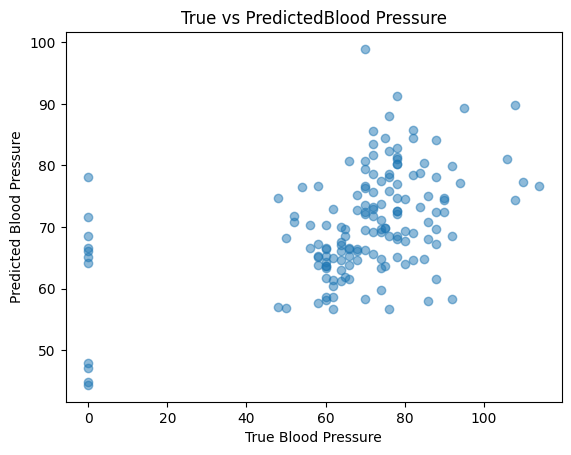

In [15]:
# Interpretation and Visualization
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Blood Pressure")
plt.ylabel("Predicted Blood Pressure")
plt.title("True vs PredictedBlood Pressure")
plt.show()

The scatter plot seem to be somewhat diagonal but is not perfectly diagonal. The points are below the dgonal line which represents underpredictions.

#Final evaluation of the model
1. MSE is 402.85 meaning the error is moderate.
The worst case squared error would be (122-0)^2=14884. Considering this MSE of 490 is considered moderate.

2. R-squared is 0.19 meaning 19% of the variance in the target variable can be explained by the features used in the model.
Hence, the model is not performing well.


In [1]:
# Classification Task
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [16]:
from google.colab import files

#Read the dataset into a pandas DataFrame.
df = pd.read_csv("/content/drive/MyDrive/AIWeek2/diabetes.csv")

x = df[['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'BloodPressure']].values
y = df['Outcome'].values

In [27]:
# splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# scale the functions
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
# initialize the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# trin the model
knn.fit(x_train, y_train)

# predict on test data
y_pred = knn.predict(x_test)

In [30]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6948051948051948


#Evaluation of the model
1.The model classifed about 69.48% of the test samples corectly. This is a moderate performance.